In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data_2023 = pd.read_csv('data_cleaned_2023.csv')
data_2023.dropna(inplace=True)
data_2023.reset_index(drop=True)

# data = pd.concat([data_2023, data_2024])

data_2024 = pd.read_csv('data_cleaned_2024.csv')
data_2024.dropna(inplace=True)
data_2024.reset_index(drop=True)
data_2024

,Date,Time,Inning,PitchNo,PAofInning,PitchofPA,Batter,BatterTeam,Pitcher,PitcherTeam,Swing/Take,Outs,Runners,Count,PlateLocHeight,PlateLocSide,ERV_delta,target
0,2024-02-16,10:09:21.840000,1,1,1,1,"Alvarez, Julian",CAL_LAN,"Scavone, Tommy",PEP_WAV,Swing,0,0,5,2.30371,-0.09952,-0.383687,0.012197
1,2024-02-16,10:09:53.220000,1,2,2,1,"Ostrander, Garrett",CAL_LAN,"Scavone, Tommy",PEP_WAV,Take,1,0,5,2.20297,1.03802,0.065422,0.086644
2,2024-02-16,10:10:08.560000,1,3,2,2,"Ostrander, Garrett",CAL_LAN,"Scavone, Tommy",PEP_WAV,Take,1,0,6,1.84496,-2.62468,0.140711,0.137897
3,2024-02-16,10:10:24.490000,1,4,2,3,"Ostrander, Garrett",CAL_LAN,"Scavone, Tommy",PEP_WAV,Take,1,0,9,2.69952,-0.96273,-0.151984,-0.129989
4,2024-02-16,10:10:40.040000,1,5,2,4,"Ostrander, Garrett",CAL_LAN,"Scavone, Tommy",PEP_WAV,Take,1,0,7,1.31319,0.73596,0.212709,0.191106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452611,2024-03-17,12:58:24.450000,6,204,4,1,"Castle, Cortlan",BAY_BEA,"Rhodes, Isaiah",TEX_RAI,Take,2,1,5,2.80228,-0.98265,-0.060647,-0.083901
452612,2024-03-17,12:59:08.050000,6,205,4,2,"Castle, Cortlan",BAY_BEA,"Rhodes, Isaiah",TEX_RAI,Take,2,1,2,0.21100,-3.63802,0.035629,0.065302
452613,2024-03-17,12:59:30.200000,6,206,4,3,"Castle, Cortlan",BAY_BEA,"Rhodes, Isaiah",TEX_RAI,Swing,2,1,4,2.40313,-0.91590,-0.338916,0.056648
452614,2024-03-17,13:02:07.680000,7,207,1,1,"McGee, Cade",TEX_RAI,"Ruais, RJ",BAY_BEA,Take,0,0,5,2.47727,-0.03029,-0.082322,-0.083901


In [12]:
data.isnull().sum()

Date              0
Time              0
Inning            0
PitchNo           0
PAofInning        0
PitchofPA         0
Batter            0
BatterTeam        0
Pitcher           0
PitcherTeam       0
Swing/Take        0
Outs              0
Runners           0
Count             0
PlateLocHeight    0
PlateLocSide      0
ERV_delta         0
target            0
Year              0
dtype: int64

In [19]:
info_cols = ['Date', 'Time', 'Inning', 'PitchNo', 'PAofInning', 'PitchofPA', 'Batter', 'BatterTeam', 'Pitcher', 'PitcherTeam']

swings_2023 = data_2023[data_2023['Swing/Take']=='Swing'].copy()
swings_info_2023 = swings_2023[info_cols]
swings_2023.drop(info_cols + ['Swing/Take'], axis=1, inplace=True)
takes_2023 = data_2023[data_2023['Swing/Take']=='Take'].copy()
takes_info_2023 = takes_2023[info_cols]
takes_2023.drop(info_cols + ['Swing/Take'], axis=1, inplace=True)

swings_2024 = data_2024[data_2024['Swing/Take']=='Swing'].copy()
swings_info_2024 = swings_2024[info_cols]
swings_2024.drop(info_cols + ['Swing/Take'], axis=1, inplace=True)
takes_2024 = data_2024[data_2024['Swing/Take']=='Take'].copy()
takes_info_2024 = takes_2024[info_cols]
takes_2024.drop(info_cols + ['Swing/Take'], axis=1, inplace=True)

In [20]:
from matplotlib.colors import Normalize

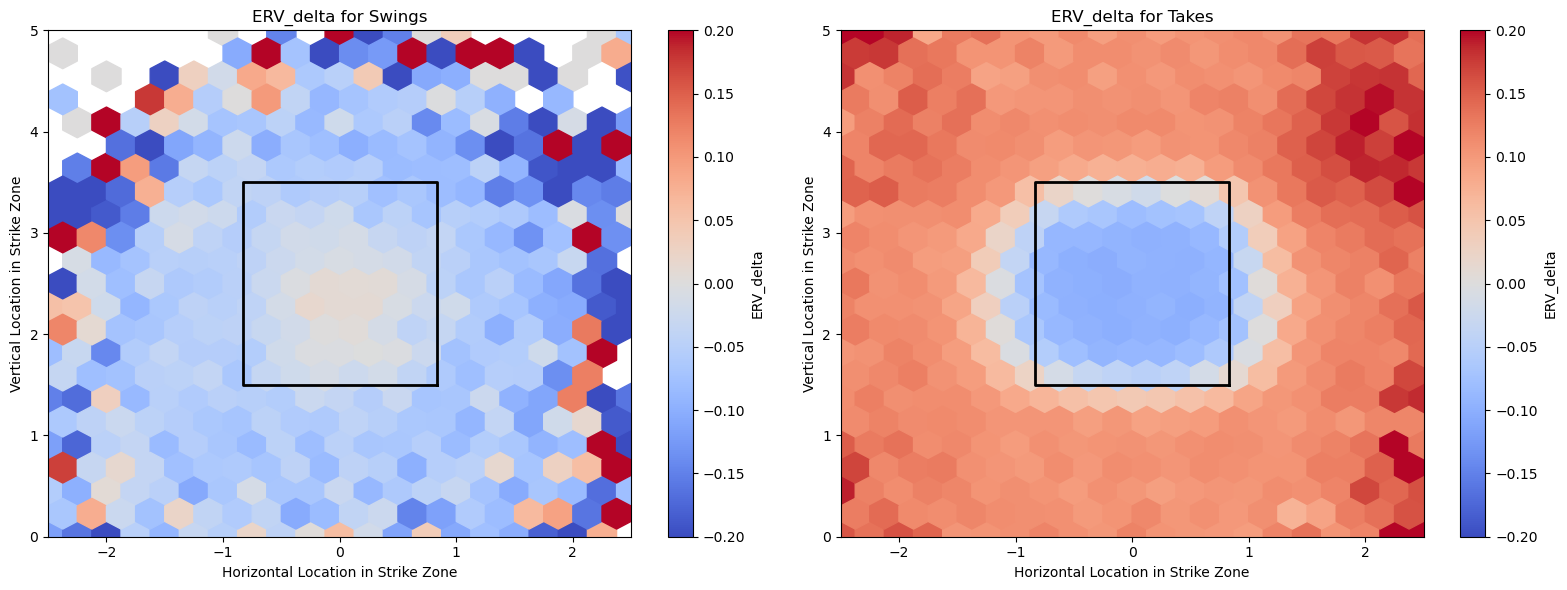

In [21]:
x_swings = swings['PlateLocSide']
y_swings = swings['PlateLocHeight']
erv_delta_swings = swings['ERV_delta']

x_takes = takes['PlateLocSide']
y_takes = takes['PlateLocHeight']
erv_delta_takes = takes['ERV_delta']

strike_zone_x = [0.833, 0.833, -0.833, -0.833, 0.833]
strike_zone_y = [1.5, 3.5, 3.5, 1.5, 1.5]
x_range = (-2.5, 2.5)
y_range = (0, 5)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Hexbin plot for swings
hb_swings = axes[0].hexbin(
    x_swings, y_swings, C=erv_delta_swings, 
    gridsize=20, extent=(x_range[0], x_range[1], y_range[0], y_range[1]), 
    cmap='coolwarm', reduce_C_function=np.mean, 
    norm=Normalize(vmin=-0.2, vmax=0.2)
)
axes[0].plot(strike_zone_x, strike_zone_y, color='black', lw=2)
axes[0].set_xlim(x_range)
axes[0].set_ylim(y_range)
axes[0].set_title('ERV_delta for Swings')
axes[0].set_xlabel('Horizontal Location in Strike Zone')
axes[0].set_ylabel('Vertical Location in Strike Zone')
fig.colorbar(hb_swings, ax=axes[0], label='ERV_delta')

# Hexbin plot for takes
hb_takes = axes[1].hexbin(
    x_takes, y_takes, C=erv_delta_takes, 
    gridsize=20, extent=(x_range[0], x_range[1], y_range[0], y_range[1]), 
    cmap='coolwarm', reduce_C_function=np.mean, 
    norm=Normalize(vmin=-0.2, vmax=0.2)
)
axes[1].plot(strike_zone_x, strike_zone_y, color='black', lw=2)
axes[1].set_xlim(x_range)
axes[1].set_ylim(y_range)
axes[1].set_title('ERV_delta for Takes')
axes[1].set_xlabel('Horizontal Location in Strike Zone')
axes[1].set_ylabel('Vertical Location in Strike Zone')
fig.colorbar(hb_takes, ax=axes[1], label='ERV_delta')

plt.tight_layout()
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
# X_takes = takes.drop(['target', 'ERV_delta'], axis=1)
# y_takes = takes['target']
# X_train, X_test, y_train, y_test = train_test_split(X_takes, y_takes, test_size=0.2, random_state=42)
X_train = takes_2023.drop(['target', 'ERV_delta'], axis=1)
y_train = takes_2023['target']

X_test = takes_2024.drop(['target', 'ERV_delta'], axis=1)
y_test = takes_2024['target']

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [25]:
# # Initialize the model
# gbr = GradientBoostingRegressor(random_state=42)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100],
#     'learning_rate': [0.1],
#     'max_depth': [3, 5, 7, 10],
#     'min_samples_split': [10, 100, 1000, 2500],
#     'min_samples_leaf': [5, 10, 25, 50],
#     'max_features': [None], # try sqrt later
#     'loss': ['huber']
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
#                            cv=3, scoring='neg_mean_squared_error', verbose=3)

# # Fit to the data
# grid_search.fit(X_train, y_train)

# # Best parameters
# print("Best Parameters:", grid_search.best_params_)

In [26]:
gbr = GradientBoostingRegressor(n_estimators=100,
                                learning_rate=0.1,
                                max_depth=7,
                                max_features=None,
                                min_samples_leaf=10,
                                min_samples_split=2500,
                                loss='huber',
                                random_state=42)

In [27]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(loss='huber', max_depth=7, min_samples_leaf=10,
                          min_samples_split=2500, random_state=42)

In [28]:
# 0.6983, 0.6892, 0.00272, 0.00281
print(f'Train score: {gbr.score(X_train, y_train)}')
print(f'Test score: {gbr.score(X_test, y_test)}')
print(f'Train MSE: {mean_squared_error(y_train, gbr.predict(X_train))}')
print(f'Test MSE: {mean_squared_error(y_test, gbr.predict(X_test))}')

Train score: 0.6937529173766959
Test score: 0.6881207678815611
Train MSE: 0.0037831822747325127
Test MSE: 0.004050751341721101


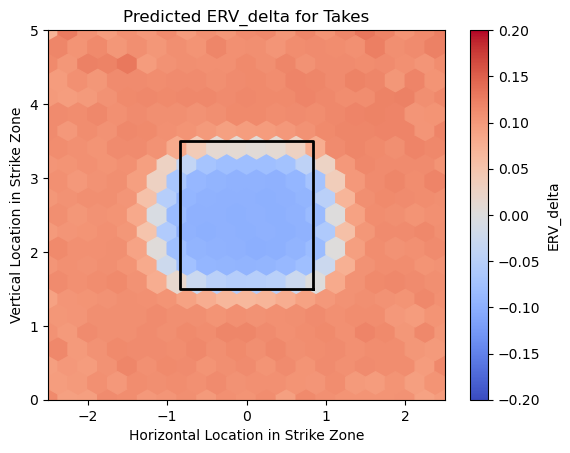

In [34]:
x = X_test['PlateLocSide']
y = X_test['PlateLocHeight']
target = gbr.predict(X_test)

# x = X_train['PlateLocSide']
# y = X_train['PlateLocHeight']
# target = gbr.predict(X_train)

strike_zone_x = [0.833, 0.833, -0.833, -0.833, 0.833]
strike_zone_y = [1.5, 3.5, 3.5, 1.5, 1.5]
x_range = (-2.5, 2.5)
y_range = (0, 5)

plt.hexbin(
    x, y, C=target, 
    gridsize=20, extent=(x_range[0], x_range[1], y_range[0], y_range[1]), 
    cmap='coolwarm', reduce_C_function=np.mean, 
    norm=Normalize(vmin=-0.2, vmax=0.2)
)
plt.plot(strike_zone_x, strike_zone_y, color='black', lw=2)
plt.xlim(x_range)
plt.ylim(y_range)
plt.title('Predicted ERV_delta for Takes')
plt.xlabel('Horizontal Location in Strike Zone')
plt.ylabel('Vertical Location in Strike Zone')
plt.colorbar(label='ERV_delta')

In [35]:
take_predictions = pd.concat([takes_info_2024.reset_index(drop=True), pd.Series(gbr.predict(X_test), name='Predicted ERV Delta')], axis=1)
take_predictions

,Date,Time,Inning,PitchNo,PAofInning,PitchofPA,Batter,BatterTeam,Pitcher,PitcherTeam,Predicted ERV Delta
0,2024-02-16,10:09:53.220000,1,2,2,1,"Ostrander, Garrett",CAL_LAN,"Scavone, Tommy",PEP_WAV,-0.054728
1,2024-02-16,10:10:08.560000,1,3,2,2,"Ostrander, Garrett",CAL_LAN,"Scavone, Tommy",PEP_WAV,0.129004
2,2024-02-16,10:10:24.490000,1,4,2,3,"Ostrander, Garrett",CAL_LAN,"Scavone, Tommy",PEP_WAV,-0.107531
3,2024-02-16,10:10:40.040000,1,5,2,4,"Ostrander, Garrett",CAL_LAN,"Scavone, Tommy",PEP_WAV,0.165607
4,2024-02-16,10:10:56.150000,1,6,2,5,"Ostrander, Garrett",CAL_LAN,"Scavone, Tommy",PEP_WAV,0.150238
...,...,...,...,...,...,...,...,...,...,...,...
272448,2024-03-17,12:56:14.160000,6,201,3,2,"Kemp, Ty",BAY_BEA,"Rhodes, Isaiah",TEX_RAI,-0.068725
272449,2024-03-17,12:56:54.220000,6,202,3,3,"Kemp, Ty",BAY_BEA,"Rhodes, Isaiah",TEX_RAI,0.047374
272450,2024-03-17,12:58:24.450000,6,204,4,1,"Castle, Cortlan",BAY_BEA,"Rhodes, Isaiah",TEX_RAI,-0.053935
272451,2024-03-17,12:59:08.050000,6,205,4,2,"Castle, Cortlan",BAY_BEA,"Rhodes, Isaiah",TEX_RAI,0.065031


In [36]:
# X_swings = swings.drop(['target', 'ERV_delta'], axis=1)
# y_swings = swings['target']
# X_train, X_test, y_train, y_test = train_test_split(X_swings, y_swings, test_size=0.2, random_state=42)

X_train = swings_2023.drop(['target', 'ERV_delta'], axis=1)
y_train = swings_2023['target']

X_test = swings_2024.drop(['target', 'ERV_delta'], axis=1)
y_test = swings_2024['target']

In [37]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(loss='huber', max_depth=7, min_samples_leaf=10,
                          min_samples_split=2500, random_state=42)

In [38]:
print(f'Train score: {gbr.score(X_train, y_train)}')
print(f'Test score: {gbr.score(X_test, y_test)}')
print(f'Train MSE: {mean_squared_error(y_train, gbr.predict(X_train))}')
print(f'Test MSE: {mean_squared_error(y_test, gbr.predict(X_test))}')

Train score: 0.43214269122900595
Test score: 0.45436825675967896
Train MSE: 0.004942869716002351
Test MSE: 0.004761147220784662


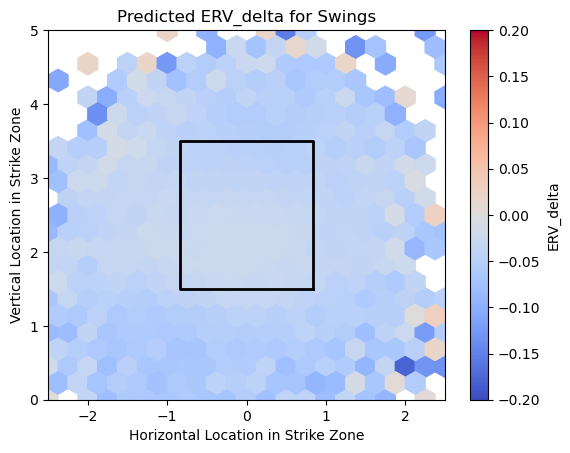

In [39]:
x = X_test['PlateLocSide']
y = X_test['PlateLocHeight']
target = gbr.predict(X_test)

# x = X_train['PlateLocSide']
# y = X_train['PlateLocHeight']
# target = gbr.predict(X_train)

strike_zone_x = [0.833, 0.833, -0.833, -0.833, 0.833]
strike_zone_y = [1.5, 3.5, 3.5, 1.5, 1.5]
x_range = (-2.5, 2.5)
y_range = (0, 5)

plt.hexbin(
    x, y, C=target, 
    gridsize=20, extent=(x_range[0], x_range[1], y_range[0], y_range[1]), 
    cmap='coolwarm', reduce_C_function=np.mean, 
    norm=Normalize(vmin=-0.2, vmax=0.2)
)
plt.plot(strike_zone_x, strike_zone_y, color='black', lw=2)
plt.xlim(x_range)
plt.ylim(y_range)
plt.title('Predicted ERV_delta for Swings')
plt.xlabel('Horizontal Location in Strike Zone')
plt.ylabel('Vertical Location in Strike Zone')
plt.colorbar(label='ERV_delta')

In [41]:
swing_predictions = pd.concat([swings_info_2024.reset_index(drop=True), pd.Series(gbr.predict(X_test), name='Predicted ERV Delta')], axis=1)
swing_predictions

,Date,Time,Inning,PitchNo,PAofInning,PitchofPA,Batter,BatterTeam,Pitcher,PitcherTeam,Predicted ERV Delta
0,2024-02-16,10:09:21.840000,1,1,1,1,"Alvarez, Julian",CAL_LAN,"Scavone, Tommy",PEP_WAV,-0.027068
1,2024-02-16,10:11:24.860000,1,7,3,1,"Carpentier Jr., Michael",CAL_LAN,"Scavone, Tommy",PEP_WAV,-0.040523
2,2024-02-16,10:11:59.140000,1,8,4,1,"Simon, Mitch",CAL_LAN,"Scavone, Tommy",PEP_WAV,-0.029451
3,2024-02-16,10:13:36.660000,1,13,4,6,"Simon, Mitch",CAL_LAN,"Scavone, Tommy",PEP_WAV,-0.089422
4,2024-02-16,10:16:17.880000,1,16,1,3,"Upstill, Nick",PEP_WAV,"Pirko, Lukas",CAL_LAN,-0.031350
...,...,...,...,...,...,...,...,...,...,...,...
169035,2024-03-17,12:44:02.490000,6,186,3,6,"Bravo, Damian",TEX_RAI,"Ruais, RJ",BAY_BEA,0.031430
169036,2024-03-17,12:54:28.920000,6,199,2,7,"Pendergrass, Will",BAY_BEA,"Rhodes, Isaiah",TEX_RAI,0.023775
169037,2024-03-17,12:57:34.230000,6,203,3,4,"Kemp, Ty",BAY_BEA,"Rhodes, Isaiah",TEX_RAI,0.039172
169038,2024-03-17,12:59:30.200000,6,206,4,3,"Castle, Cortlan",BAY_BEA,"Rhodes, Isaiah",TEX_RAI,-0.055506


In [59]:
in_zone_aware = take_predictions.groupby(['Batter', 'BatterTeam'])['Predicted ERV Delta'].mean().reset_index()
in_zone_aware['Predicted ERV Delta'] = in_zone_aware['Predicted ERV Delta']*100
in_zone_aware.rename(columns={'Predicted ERV Delta': 'In-Zone Awareness'}, inplace=True)

out_zone_aware = swing_predictions.groupby(['Batter', 'BatterTeam'])['Predicted ERV Delta'].mean().reset_index()
out_zone_aware['Predicted ERV Delta'] = out_zone_aware['Predicted ERV Delta']*100
out_zone_aware.rename(columns={'Predicted ERV Delta': 'Out-of-Zone Awareness'}, inplace=True)

decision_value = (
    pd.concat([take_predictions, swing_predictions])
    .groupby('Batter')
    .filter(lambda x: len(x) > 100)
    .groupby(['Batter', 'BatterTeam'])['Predicted ERV Delta']
    .mean()
    .reset_index()
)
decision_value['Predicted ERV Delta'] = decision_value['Predicted ERV Delta']*100
decision_value.rename(columns={'Predicted ERV Delta': 'Decision Value'}, inplace=True)
decision_value.sort_values('Decision Value', ascending=False)

decision_value

,Batter,BatterTeam,Decision Value
0,"Abrams, Gavin",OLD_MON,2.244669
1,"Abshire, Matt",ULM_WAR,1.323631
2,"Acal, Justin",NEV_WOL,1.135522
3,"Adair, Michael",DAY_FLY,2.728028
4,"Adams, Corey",WM_TRI,1.357288
...,...,...,...
1783,"Zirwas, Devan",VCU_RAM,-0.219409
1784,"Zmarzlak, Bobby",GIT_YEL,2.918714
1785,"Zollo, Anthony",ION_GAE,-0.639964
1786,"Zuccaro, Giano",EMU_EAG,1.331057


In [79]:
dummy = pd.merge(in_zone_aware, out_zone_aware, on=['Batter', 'BatterTeam'])
batters = pd.merge(dummy, decision_value, on=['Batter', 'BatterTeam']).dropna().reset_index(drop=True)
batters.sort_values('Decision Value', ascending=False, inplace=True)
batters.reset_index(drop=True, inplace=True)

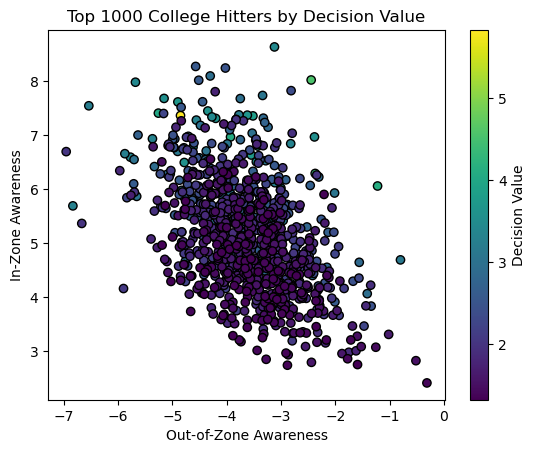

In [80]:
batters_adj = batters.sort_values('Decision Value', ascending=False).head(1000)

plt.scatter(
    batters_adj['Out-of-Zone Awareness'], 
    batters_adj['In-Zone Awareness'], 
    c=batters_adj['Decision Value'],  # Pass numeric values
    cmap='viridis',               # Choose a colormap (e.g., 'viridis', 'plasma', 'coolwarm')
    edgecolor='k',                # Add edges to points for clarity
)

plt.colorbar(label='Decision Value')  # Add a colorbar for reference
plt.xlabel('Out-of-Zone Awareness')
plt.ylabel('In-Zone Awareness')
plt.title('Top 1000 College Hitters by Decision Value')

# # Add labels for each point
# for i, batter in enumerate(players['Batter']):
#     x = players_adj['Out-of-Zone Awareness'].iloc[i]
#     y = players_adj['In-Zone Awareness'].iloc[i]
#     plt.text(x, y, batter, fontsize=8, ha='right', va='bottom')  # Adjust text position and size

plt.show()

In [81]:
batters.head(10)

,Batter,BatterTeam,In-Zone Awareness,Out-of-Zone Awareness,Decision Value
0,"Smith, Kyle",NIU_HUS,7.359865,-4.851996,5.833382
1,"Jumper, Cross",ASU_RED,8.018326,-2.446057,4.562200
2,"Collins, Corey",GEO_BUL,5.666669,-3.679846,4.478095
3,"Smithwick, Campbell",OLE_REB,6.289383,-2.372332,4.357633
4,"Godbout, Henry",VIR_CAV,6.795326,-3.426472,4.175990
5,"Urso, JD",MIA_HUR,6.057071,-1.223544,4.124164
6,"Cross, Kerrington",CIN_BEA,6.964502,-3.931045,4.076085
7,"Cozart, Jacob",NOR_WOL,6.544727,-3.779007,4.060177
8,"Goldstein, Dylan",GEO_BUL,7.404923,-5.259341,4.014994
9,"Petersen, Sam",IOW_HAW,7.353681,-3.518289,3.824560


In [82]:
batters[batters['BatterTeam']=='SAN_GAU'].sort_values('Decision Value', ascending=False)

,Batter,BatterTeam,In-Zone Awareness,Out-of-Zone Awareness,Decision Value
158,"Oakley, Nick",SAN_GAU,6.435404,-3.120882,2.551566
159,"Brethowr, Ivan",SAN_GAU,6.044169,-3.645509,2.550612
244,"Trimble, Justin",SAN_GAU,6.507243,-4.360390,2.312718
340,"Calvin, Reiss",SAN_GAU,5.611226,-4.785042,2.121050
753,"Nunez, Corey",SAN_GAU,4.482962,-3.557210,1.571865
776,"McCollum, LeTrey",SAN_GAU,4.828492,-3.622636,1.550037
1099,"Durfee, Brendan",SAN_GAU,5.423007,-3.534874,1.216698
1146,"Sebring, Jonah",SAN_GAU,4.525950,-3.191880,1.160617
1409,"Parker, Aaron",SAN_GAU,4.072242,-3.938497,0.820358
1569,"Brown, Jessada",SAN_GAU,4.296564,-4.161282,0.537521


In [20]:
# from xgboost import XGBRegressor
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.pipeline import Pipeline

In [21]:
# X_swing = swings.drop(['target', 'ERV_delta'], axis=1)
# y_swing = swings['target']
# X_take = takes.drop(['target', 'ERV_delta'], axis=1)
# y_take = takes['target']

In [22]:
# # Define features
# columns_to_scale = ['PlateLocHeight', 'PlateLocSide']
# columns_to_leave = ['Count']

# # Define preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('scaler', StandardScaler(), columns_to_scale),
#         ('passthrough', 'passthrough', columns_to_leave)
#     ]
# )

# # Define the XGBRegressor model
# xgb_model = XGBRegressor(
#     objective='reg:squarederror',  # Regression objective
#     n_estimators=100,             # Number of boosting rounds
#     learning_rate=0.1,            # Step size shrinkage
#     max_depth=5,                  # Maximum depth of trees
#     subsample=0.8,                # Subsample ratio of the training data
#     colsample_bytree=0.8,         # Subsample ratio of features for each tree
#     random_state=42               # Random seed
# )

# # Create a pipeline
# pipeline_swing = Pipeline(steps=[
#     ('preprocessor', preprocessor),  # Preprocessing step
#     ('model', xgb_model)             # XGBoost model
# ])

# X_train, X_test, y_train, y_test = train_test_split(X_swing, y_swing, test_size=0.2, random_state=42)

# pipeline_swing.fit(X_train, y_train)


# y_pred = pipeline_swing.predict(X_test)
# y_pred_train = pipeline_swing.predict(X_train)

# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Test Data Metrics:")
# print(f"Mean Squared Error (MSE): {mse:.4f}")
# print(f"Mean Absolute Error (MAE): {mae:.4f}")
# print(f"R-squared (R²): {r2:.4f}")

# mse_train = mean_squared_error(y_train, y_pred_train)
# r2_train = r2_score(y_train, y_pred_train)

# print("\nTraining Data Metrics:")
# print(f"Mean Squared Error (MSE): {mse_train:.4f}")
# print(f"R-squared (R²): {r2_train:.4f}")

Test Data Metrics:
Mean Squared Error (MSE): 0.0043
Mean Absolute Error (MAE): 0.0567
R-squared (R²): 0.3623

Training Data Metrics:
Mean Squared Error (MSE): 0.0043
R-squared (R²): 0.3657


In [23]:
# keep batter names in the data and calculate decision value
# decision value is delta expected run value per 100 pitches